<a href="https://colab.research.google.com/github/keerthanakkumar/Laptop-Price-Prediction/blob/main/laptop_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import joblib

import warnings

warnings.filterwarnings('ignore')

In [2]:
laptop_data = pd.read_csv('/content/laptop_data.csv')
data= laptop_data.copy()

## EXPLORATORY DATA ANALYSIS

In [3]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
data.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [5]:
data.shape

(1303, 12)

In [6]:
data.size

15636

In [7]:
data.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [8]:
data.nunique()

Unnamed: 0          1303
Company               19
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price                791
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [10]:
# find missing values
data.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [11]:
# remove unnecessary features
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
# value count of Companies
data['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

## DATA VISUALIZATION

In [13]:
# setting graph format
plt.rcParams['font.size'] = 9
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['lines.linewidth'] = 2

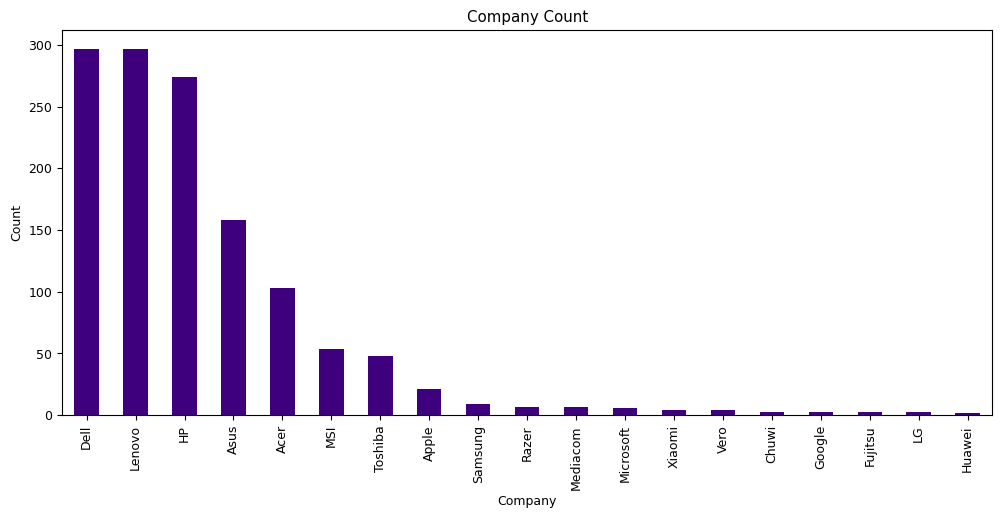

In [14]:
# Barplot on Company
data['Company'].value_counts().plot(kind = 'bar', cmap= 'Purples_r')
plt.title('Company Count')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()

Dell and Lenovo has most number of Laptops

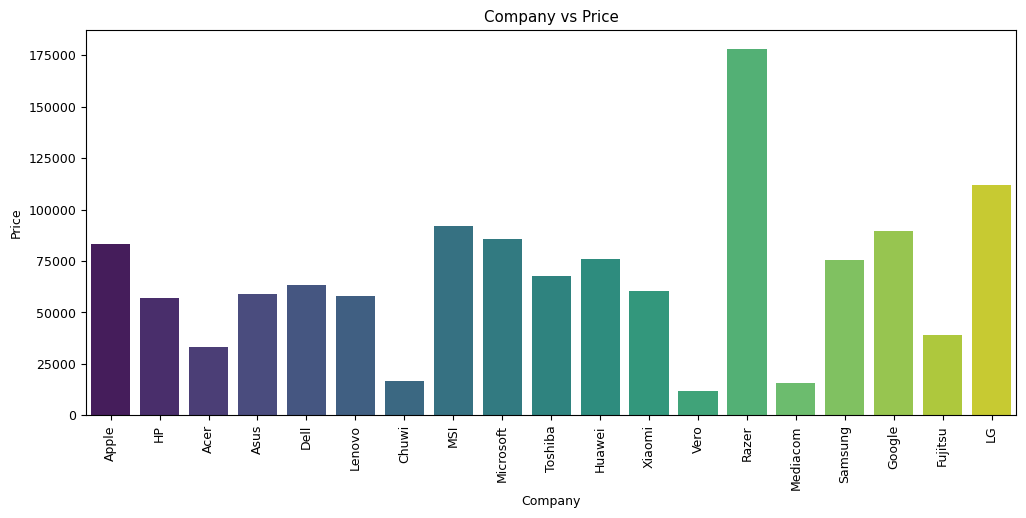

In [15]:
# Company vs Price
sns.barplot(x=data['Company'],
            y= data['Price'],
            errorbar=('ci', False),
            palette='viridis')
plt.xticks(rotation='vertical')
plt.title('Company vs Price')
plt.show()

Razer has the most expensive laptop

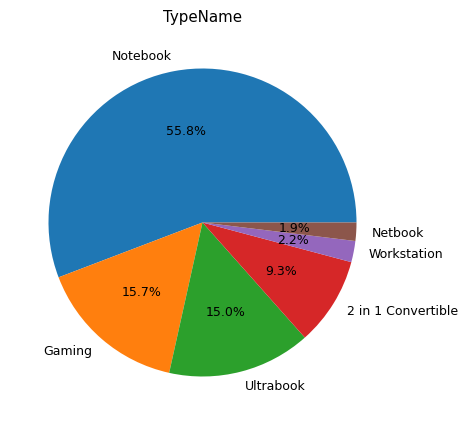

In [16]:
plt.pie(data['TypeName'].value_counts(),
        labels=data['TypeName'].value_counts().index,
        autopct='%1.1f%%')
plt.title('TypeName')
plt.show()

Most of the Laptops are Notebook type

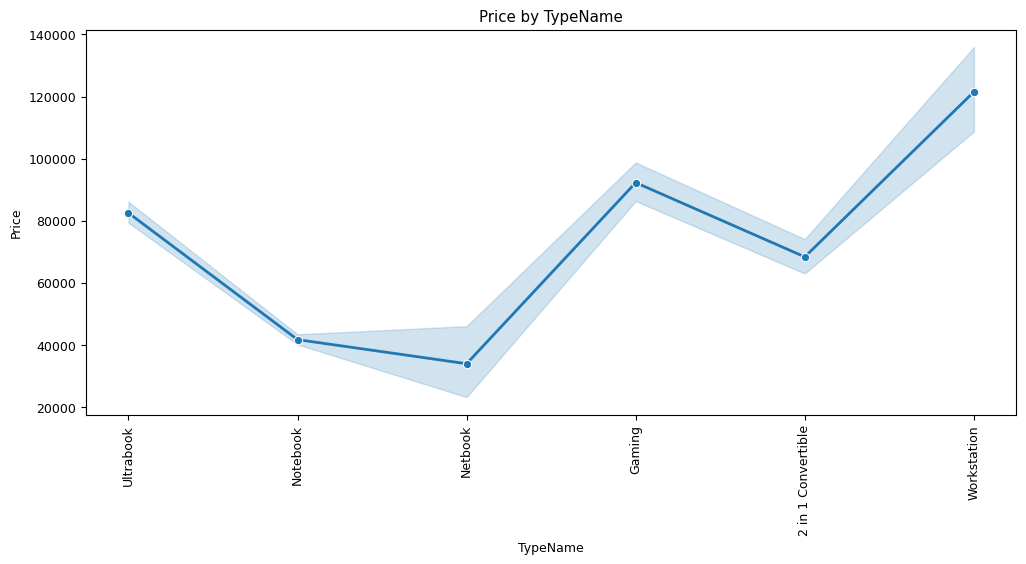

In [17]:
# TypeName vs Price
sns.lineplot(x=data['TypeName'],
             y=data['Price'],
             marker='o')
plt.title('Price by TypeName')
plt.xticks(rotation='vertical')
plt.show()

Workstation has the most expensive laptops

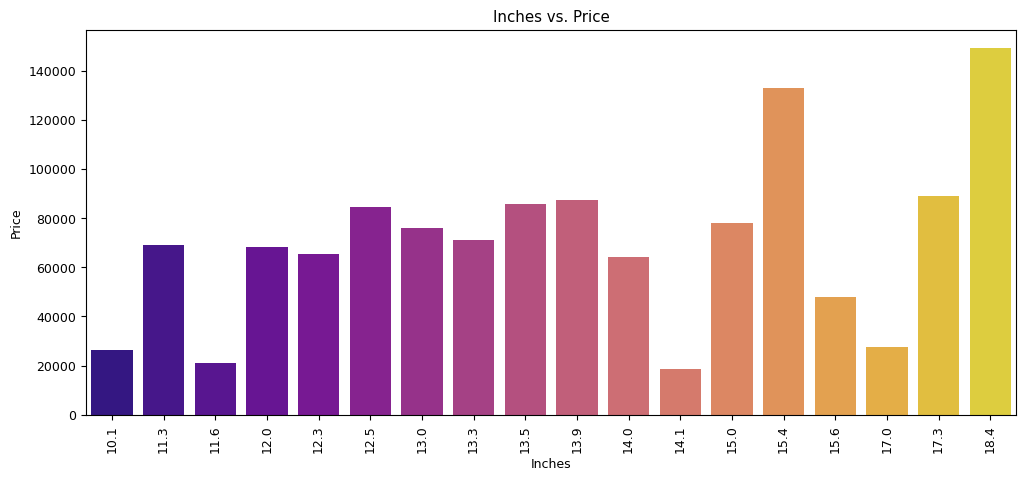

In [18]:
# Inches vs price
sns.barplot(data=data,
                x='Inches',
                y='Price',
                errorbar=('ci', False),
                palette='plasma')
plt.title('Inches vs. Price')
plt.xlabel('Inches')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

Laptops of inch 18.4 has the highest price

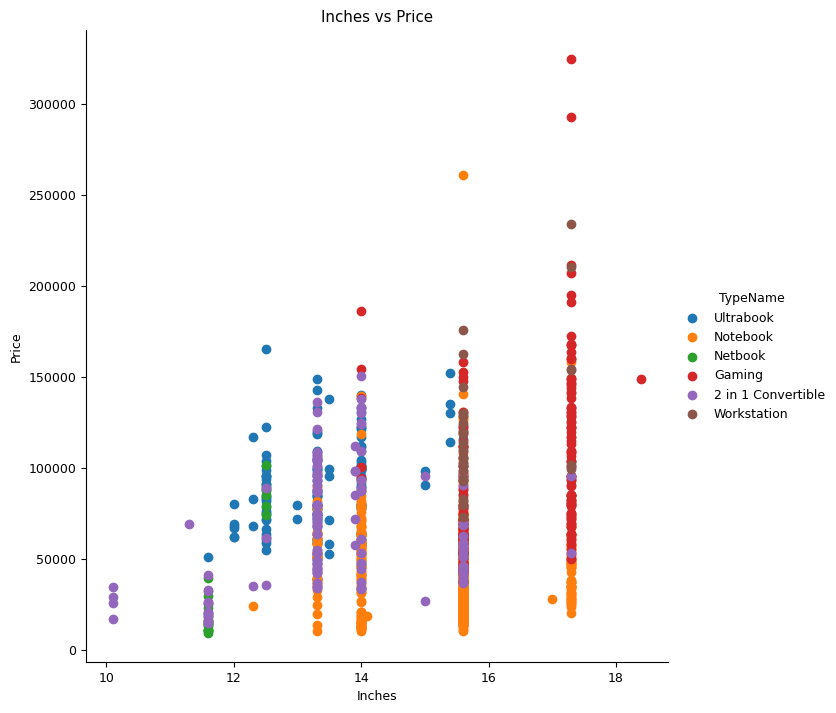

In [19]:
sns.FacetGrid(data, hue='TypeName', height=7).map(plt.scatter, 'Inches', 'Price').add_legend()
plt.title('Inches vs Price')
plt.show()

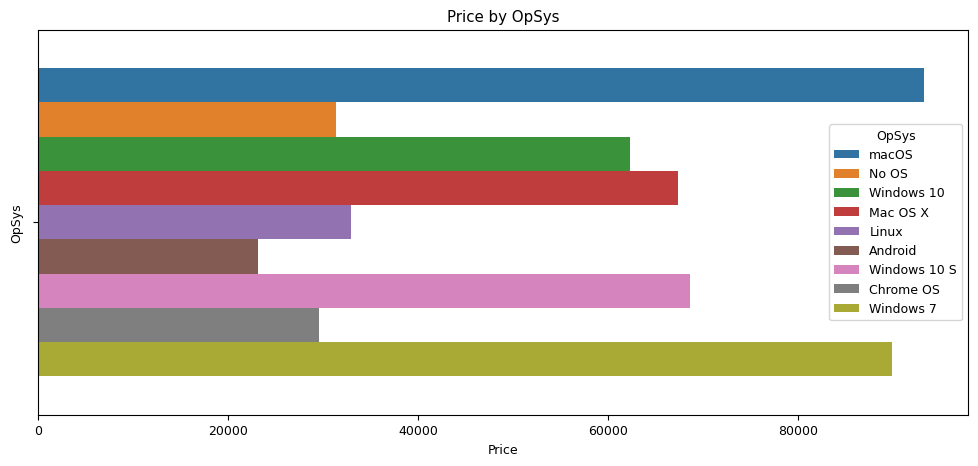

In [20]:
sns.barplot(data=data,
            x='Price',
            hue='OpSys',
            errorbar=('ci', False))
plt.title('Price by OpSys')
plt.xlabel('Price')
plt.ylabel('OpSys')
plt.show()

Macos and Windows 7 has maximum price

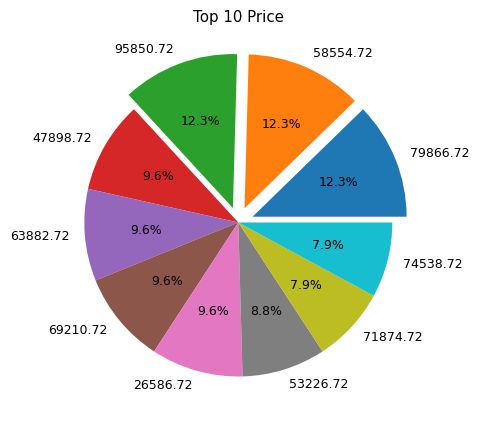

In [21]:
# Top 10 Price range
explode = [0.1,0.1,0.1,0,0,0,0,0,0,0]
data['Price'].value_counts()
top10_price = data['Price'].value_counts().head(10)
plt.pie(top10_price,
        labels=top10_price.index,
        explode=explode,
        autopct='%1.1f%%')
plt.title('Top 10 Price')
plt.show()

Here we know top 3 common price range on laptops

## FEATURE ENGINEERING

In [22]:
# removing units
data['Ram'] = data['Ram'].str.replace('GB', '').astype(int)
data['Weight'] = data['Weight'].str.replace('kg', '').astype(float)

**Touch Screen Column**

In [23]:
# 0 - not Touch Screen, 1 - Touch Screen
data['TouchScreen'] = data['ScreenResolution'].apply(lambda x :1 if 'Touchscreen' in x else 0)
data['TouchScreen'].value_counts()

TouchScreen
0    1111
1     192
Name: count, dtype: int64

**IPS Panel column**

In [24]:
# 1 - For IPS Display, 0 - Not IPS Display
data['IPS Panel'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)
data['IPS Panel'].value_counts()

IPS Panel
0    938
1    365
Name: count, dtype: int64

**HD Column**

In [25]:
def categorize_resolution(resolution):
    if 'Full HD' in resolution:
        return 'Full HD'
    elif 'Quad HD+' in resolution:
        return 'Quad HD+'
    elif '4K Ultra HD' in resolution:
        return '4K Ultra HD'
    else:
        return 0

In [26]:
data['HD'] = data['ScreenResolution'].apply(categorize_resolution)
data['HD'].value_counts()

HD
Full HD        843
0              387
4K Ultra HD     43
Quad HD+        30
Name: count, dtype: int64

**Pixel Per Inches Column**

In [27]:
data['ScreenResolution'] = data['ScreenResolution'].str.split(' ').apply(lambda x:x[-1])
data['ScreenWidth'] = data['ScreenResolution'].str.split('x').apply(lambda x:x[0]).astype(float)
data['ScreenHeight'] = data['ScreenResolution'].str.split('x').apply(lambda x:x[1]).astype(float)

In [28]:
data['PPI'] = (((data['ScreenWidth']**2) + (data['ScreenHeight']**2))**0.5/data['Inches']).astype('float')

**CPU Brand column**

In [29]:
data['Cpu Name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [30]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3' or text =='Samsung Cortex A72&A53':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [31]:
data['Cpu brand'] = data['Cpu Name'].apply(fetch_processor)

**Total Storage**

In [32]:
# Process Memory column
data['Memory'] = data['Memory'].astype(str).replace(r'\.0', '', regex=True)
data['Memory'] = data['Memory'].str.replace('GB', '')
data['Memory'] = data['Memory'].str.replace('TB', '000')

In [33]:
# Split data to 2 parts
new = data['Memory'].str.split('+', n=1, expand=True)
data['First'] = new[0].str.strip()
data['Second'] = new[1].fillna('0')

In [34]:
# Storage in first part
data['FirstHDD'] = data['First'].apply(lambda x: 1 if "HDD" in x else 0)
data['FirstSSD'] = data['First'].apply(lambda x: 1 if "SSD" in x else 0)
data['FirstHybrid'] = data['First'].apply(lambda x: 1 if "Hybrid" in x else 0)
data['FirstFlash_Storage'] = data['First'].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [35]:
# Remove all non-digit characters from the first part to extract the numeric value.
data['First'] = data['First'].str.replace(r'\D', '', regex=True).astype(int)

In [36]:
# Storage of second part
data['SecondHDD'] = data['Second'].apply(lambda x: 1 if "HDD" in x else 0)
data['SecondSSD'] = data['Second'].apply(lambda x: 1 if "SSD" in x else 0)
data['SecondHybrid'] = data['Second'].apply(lambda x: 1 if "Hybrid" in x else 0)
data['SecondFlash_Storage'] = data['Second'].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [37]:
# remove non-digit from second part
data['Second'] = data['Second'].str.replace(r'\D', '', regex=True).astype(int)

In [38]:
# Total storage space
data['HDD'] = data['First'] * data['FirstHDD'] + data['Second'] * data['SecondHDD']
data['SSD'] = data['First'] * data['FirstSSD'] + data['Second'] * data['SecondSSD']
data['Hybrid'] = data['First'] * data['FirstHybrid'] + data['Second'] * data['SecondHybrid']
data['Flash_Storage'] = data['First'] * data['FirstFlash_Storage'] + data['Second'] * data['SecondFlash_Storage']

**GPU Brand column**

In [39]:
data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [40]:
data['Gpu brand'] = data['Gpu'].apply(lambda x:x.split()[0])
data['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

Remove unnecessary columns

In [41]:
data.drop(['ScreenResolution', 'Cpu','Memory', 'Gpu','ScreenWidth', 'ScreenHeight','First', 'Second', 'FirstHDD', 'FirstSSD', 'FirstHybrid',
       'FirstFlash_Storage', 'SecondHDD', 'SecondSSD', 'SecondHybrid','SecondFlash_Storage','Cpu Name'], axis=1, inplace=True)

In [42]:
# encoding
categorical_features = ['Company', 'TypeName', 'OpSys', 'HD', 'Cpu brand', 'Gpu brand']
data = pd.get_dummies(data, columns=categorical_features).astype(int)

In [43]:
# select features that are greater than the threshold
cor_target = abs(data.corr()['Price'])
relevant_features = cor_target[cor_target>0.1].index
correlated_data = data[relevant_features]
correlated_data.head()

,Inches,Ram,Weight,Price,TouchScreen,IPS Panel,PPI,SSD,Company_Acer,Company_MSI,...,HD_Full HD,HD_Quad HD+,Cpu brand_AMD Processor,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_AMD,Gpu brand_Intel,Gpu brand_Nvidia
0,13,8,1,71378,0,1,226,128,0,0,...,0,0,0,0,1,0,0,0,1,0
1,13,8,1,47895,0,0,127,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,15,8,1,30636,0,0,141,256,0,0,...,1,0,0,0,1,0,0,0,1,0
3,15,16,1,135195,0,1,220,512,0,0,...,0,0,0,0,0,1,0,1,0,0
4,13,8,1,96095,0,1,226,256,0,0,...,0,0,0,0,1,0,0,0,1,0


## MODEL CREATION

In [44]:
# split features and target
features = correlated_data.drop('Price', axis=1)
target = correlated_data['Price']

In [45]:
# train test split data
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=1)

In [46]:
# create pipelines using tuples
pipeline_lr = Pipeline([
    ('lr_regressor', LinearRegression())
])

pipeline_dt = Pipeline([
    ('dt_regressor', DecisionTreeRegressor())
])

pipeline_rf = Pipeline([
    ('rf_regressor', RandomForestRegressor())
])

In [47]:
# list of pipeline
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf]

# fit pipelines
for pipe in pipelines:
    pipe.fit(feature_train, target_train)

In [48]:
# dictionary of pipelines and classifiers
pipe_dictionary = {0:'LinearRegression', 1:'DecisionTreeRegressor', 2:'RandomForestRegressor'}

# perfomace evaluation
for i, model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dictionary[i], model.score(feature_test, target_test)))

LinearRegression Test Accuracy: 0.8244800827912302
DecisionTreeRegressor Test Accuracy: 0.7755516508275137
RandomForestRegressor Test Accuracy: 0.8553687522606286


In [49]:
for i, model in enumerate(pipelines):
  if model.score(feature_test,target_test) > 0.0:
    best_score = model.score(feature_test,target_test)
    best_model = model
    best_regressor = i
print('The best model for regression is: {}'.format(pipe_dictionary[best_regressor]))

The best model for regression is: RandomForestRegressor


The best Regressor model is RandomForest Regressor which gives good score

In [50]:
# Hyperparametric tuning
randomforest = RandomForestRegressor()
param = {
    'n_estimators': [10, 50, 100],
    'bootstrap':[True, False],
    'random_state':[0, 1, 42]
}

In [51]:
gd = GridSearchCV(randomforest, param, cv=10, scoring='r2')
gd.fit(feature_train, target_train)
print("Best Parameters:", gd.best_params_)

Best Parameters: {'bootstrap': True, 'n_estimators': 100, 'random_state': 1}


In [52]:
model_creation = RandomForestRegressor(n_estimators=100, bootstrap=True, random_state=1)
model_creation.fit(feature_train, target_train)
target_predict = model_creation.predict(feature_test)

PERFOMACE EVALUATION

In [53]:
print('R2 score: ', r2_score(target_test, target_predict))

R2 score:  0.8571899667361156


SAVE MODEL

In [54]:
joblib.dump(model_creation, 'laptop_price_model')

['laptop_price_model']